# Full Explanation : https://www.notion.so/Smoke-detection-2fe659dff8b380979084ec538fb0da20?source=copy_link

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/asepsr37/data-and-machine-learning/main/classification/smoke-detection/smoke_detection_iot.csv")
print(df.tail(5))

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
62625        400   13723        20569        936.670   0.63   0.65   4.32   
62626        400   13731        20588        936.678   0.61   0.63   4.18   
62627        400   13725        20582        936.687   0.57   0.60   3.95   
62628        400   13712        20566        936.680   0.57   0.59   3.92   
62629        400   13696        20543        936.676   0.57   0.59   3.90   

       NC1.0  NC2.5   CNT  Fire Alarm  
62625  0.673  0.015  5739           0  
62626  0.652  0.01

# Menelaah Data

In [3]:
print(df.shape)

(62630, 16)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None


In [5]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


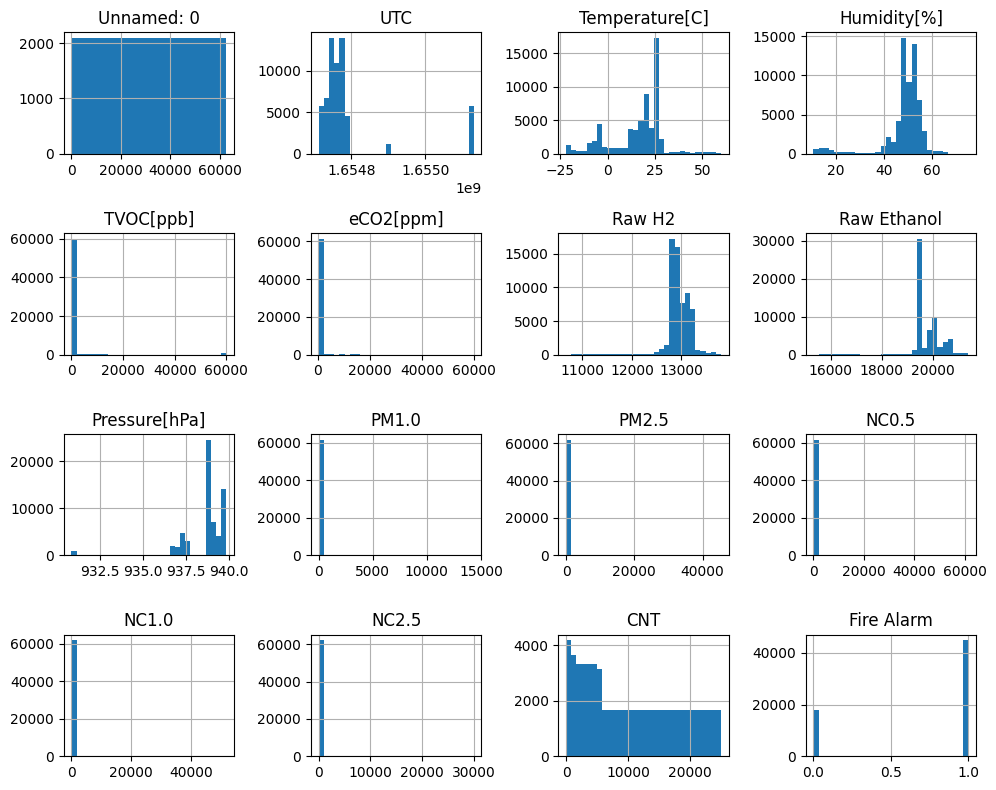

In [6]:
df.hist(
    bins=30,
    figsize=(10, 8)
)

plt.tight_layout()
plt.show()

# Validasi Data

In [7]:
df.isna().sum()

,0
Unnamed: 0,0
UTC,0
Temperature[C],0
Humidity[%],0
TVOC[ppb],0
eCO2[ppm],0
Raw H2,0
Raw Ethanol,0
Pressure[hPa],0
PM1.0,0


In [8]:
df.duplicated().sum()

np.int64(0)

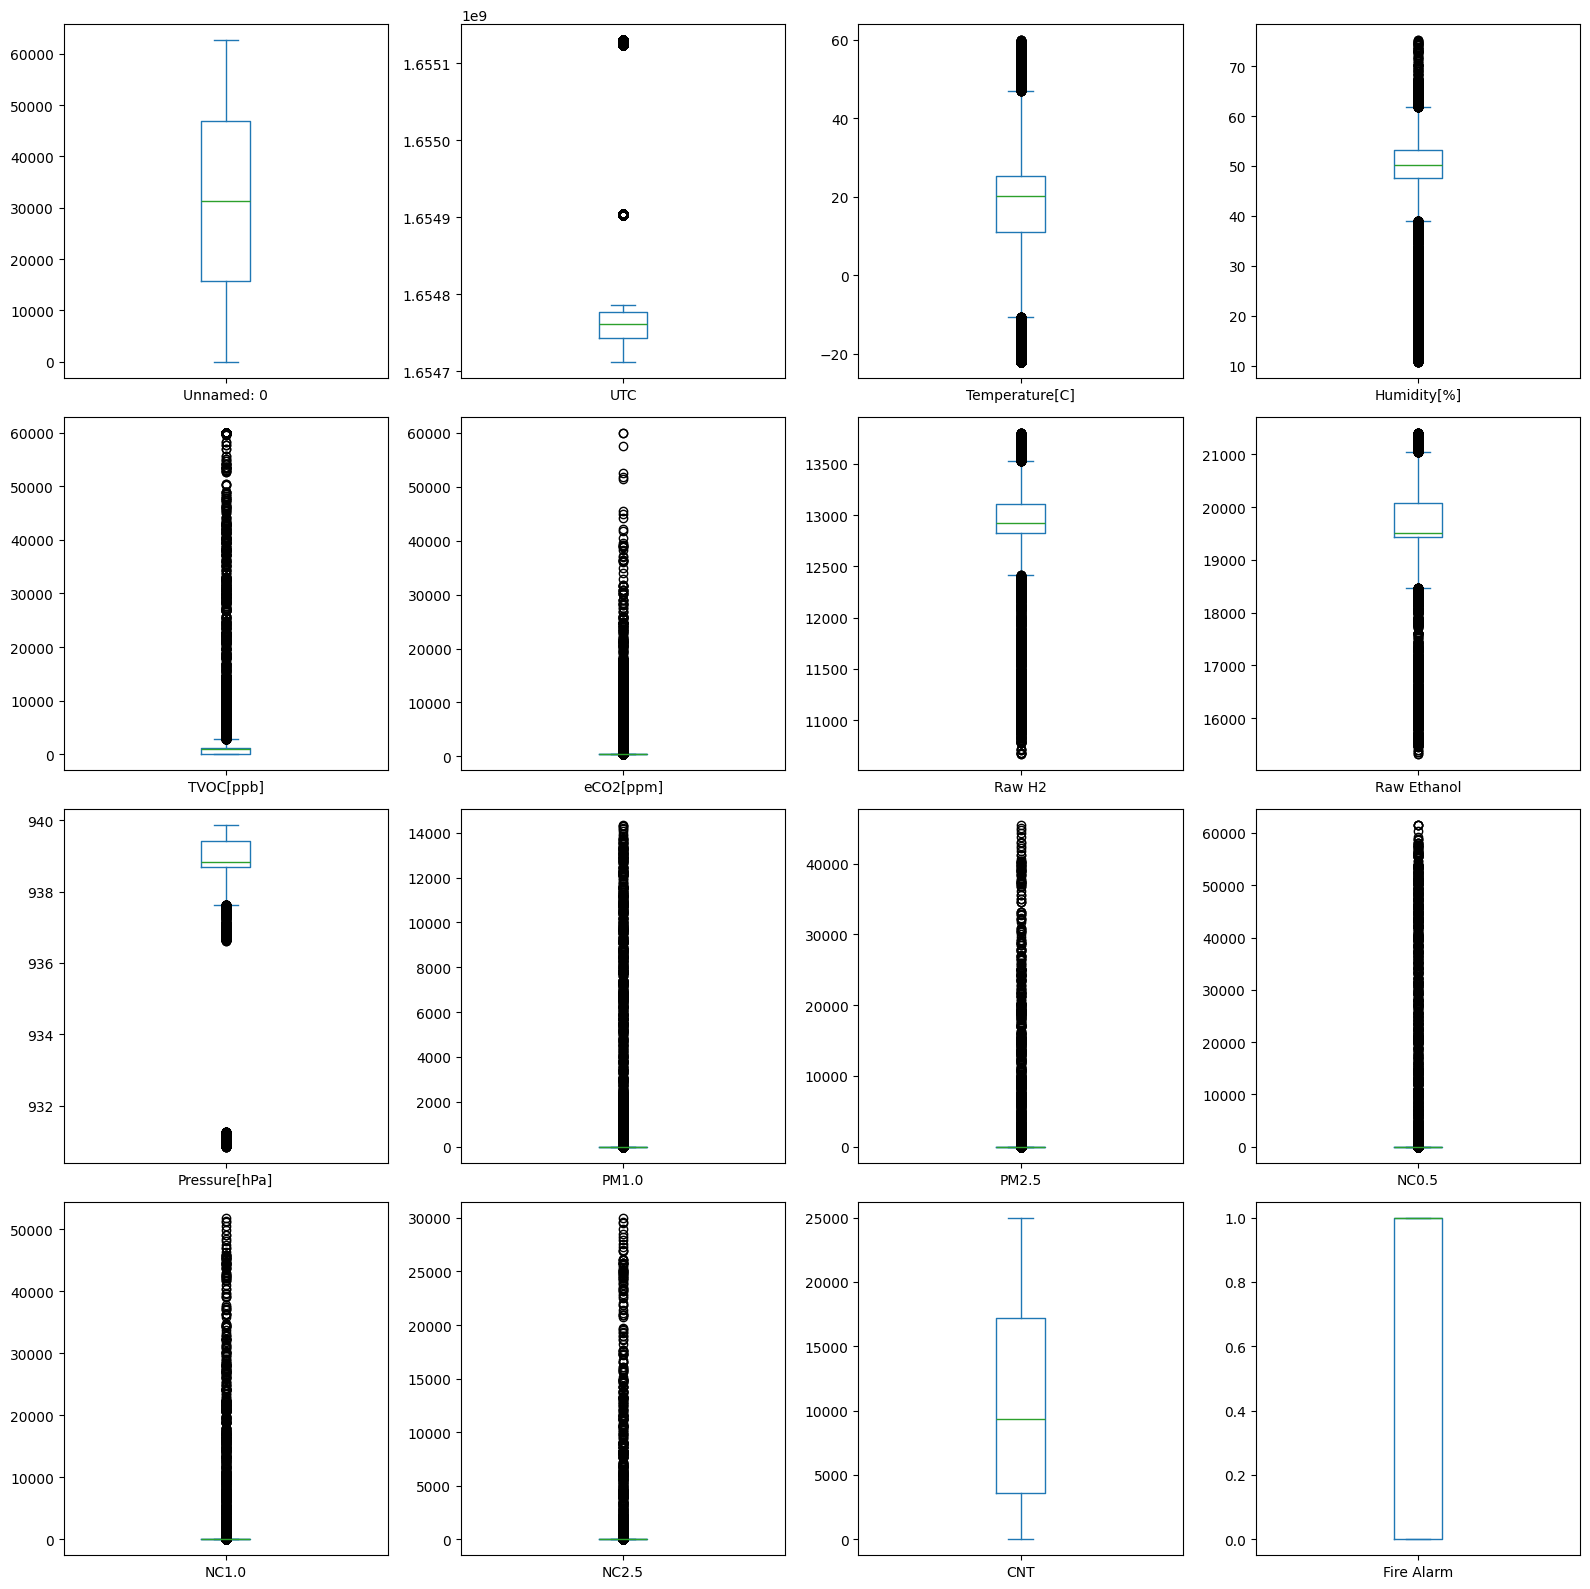

In [9]:
import matplotlib.pyplot as plt
import math

n_cols = 4   # jumlah boxplot per baris (bebas diubah)
n_rows = math.ceil(len(df.columns) / n_cols)

df.plot(
    kind='box',
    subplots=True,
    layout=(n_rows, n_cols),
    figsize=(16, 4 * n_rows),
    sharex=False
)

plt.tight_layout()
plt.show()


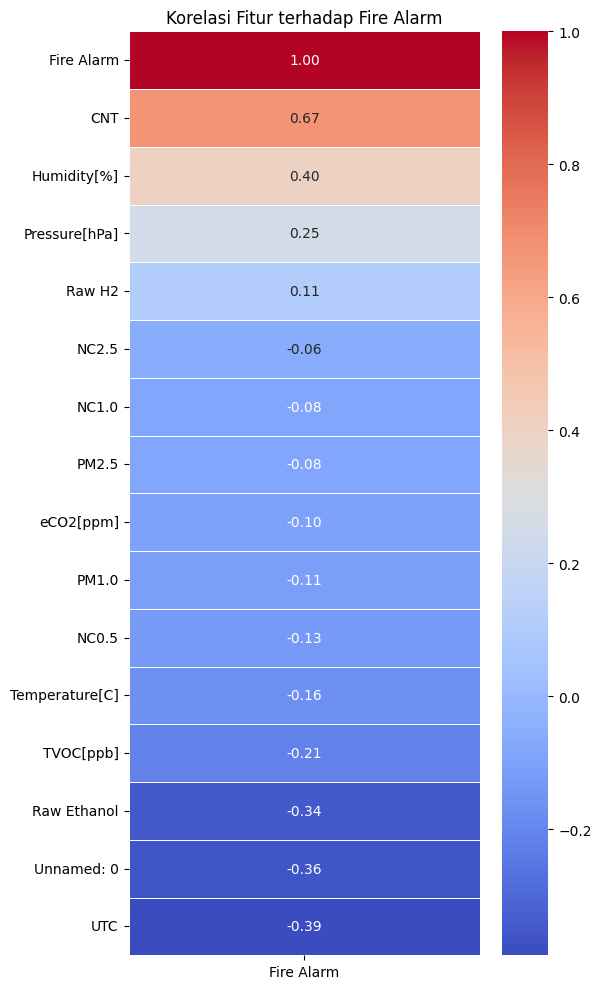

In [10]:
# hitung korelasi terhadap Fire Alarm
corr_target = df.corr()[['Fire Alarm']].sort_values(
    by='Fire Alarm', ascending=False
)

plt.figure(figsize=(6, 10))

sns.heatmap(
    corr_target,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Korelasi Fitur terhadap Fire Alarm")
plt.tight_layout()
plt.show()

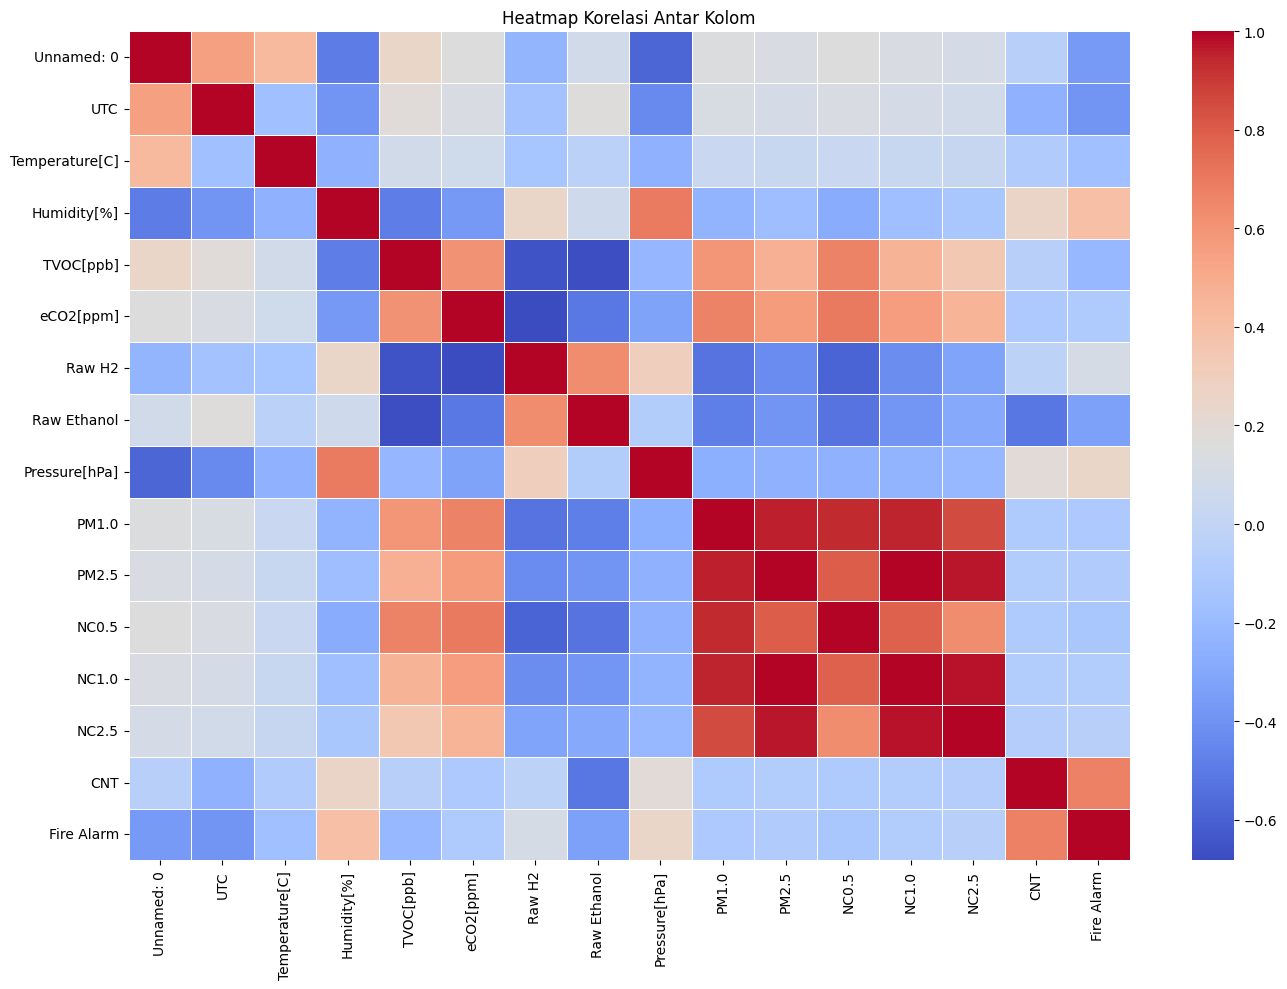

In [11]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Heatmap Korelasi Antar Kolom")
plt.tight_layout()
plt.show()


# Membersihkan Data

In [12]:
df_clean = df.copy()

In [13]:
# Menghapus Kolom
df_clean = df_clean.drop(columns=[
    "Unnamed: 0",
    "UTC",
    "CNT",
    "eCO2[ppm]"
])

In [14]:
# modifikasi nama kolom
df_clean.columns = (
    df_clean.columns
    .str.lower()
    .str.replace(' ', '_')
)


In [15]:
import pandas as pd

# Daftar kolom target
columns_to_handle = [
    'temperature[c]', 'humidity[%]', 'tvoc[ppb]', 'raw_h2',
    'raw_ethanol', 'pressure[hpa]', 'pm1.0', 'pm2.5',
    'nc0.5', 'nc1.0', 'nc2.5'
]

for col in columns_to_handle:
    if col in df_clean.columns:
        # menghitung Q1 dan Q3
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        # menghitung iqr
        IQR = Q3 - Q1

        #  batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #  Nilai di luar batas diubah menjadi nilai batas tersebut
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

print("Handling outliers dengan IQR (Capping) selesai!")

Handling outliers dengan IQR (Capping) selesai!


Penanganan outliers dilakukan menggunakan metode IQR Capping. Nilai ekstrem yang berada di luar batas $[Q1 - 1.5 \times IQR]$ atau $[Q3 + 1.5 \times IQR]$ diganti (capped) dengan nilai ambang batas terdekatnya. Teknik ini dipilih agar distribusi data lebih stabil tanpa mengurangi jumlah baris data, sehingga model dapat belajar dengan lebih baik tanpa terganggu oleh nilai anomali.

In [16]:
# df_clean.duplicated().sum()

In [17]:
# Hapus duplikat yang muncul akibat proses capping
df_clean = df_clean.drop_duplicates()

Munculnya duplikat setelah capping adalah konsekuensi logis dari penyamaan nilai ekstrem ke ambang batas statistik ($Upper\ Bound$). Karena beberapa baris data memiliki fitur pendukung yang sama namun awalnya hanya berbeda di nilai ekstremnya, proses capping membuat baris-baris tersebut menjadi identik. Saya memutuskan untuk menghapus duplikat tersebut guna menghindari over-representation (pemberian bobot berlebih) pada nilai ambang batas, sehingga model tetap objektif dalam mempelajari pola data.

# Mengontruksi Data

In [18]:
df_construction = df_clean.copy()

In [19]:
# Menentukan Fitur (X) dan Target (y)
X =df_construction.drop('fire_alarm', axis=1)
y = df_construction['fire_alarm']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
print(y_train.value_counts())

fire_alarm
1    35802
0    13772
Name: count, dtype: int64


In [22]:
# Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PEmodelan

In [23]:
# Tambahkan class_weight='balanced' untuk menangani ketidakseimbangan data
rf_original = RandomForestClassifier(random_state=42, class_weight='balanced')

# Parameter
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Setup RandomizedSearchCV sebagai Hyperparameter Tunning
fast_search_no_smote = RandomizedSearchCV(
    rf_original, param_dist, n_iter=5, cv=3, n_jobs=-1, random_state=42
)

# Latih Model pada data asli
fast_search_no_smote.fit(X_train_scaled, y_train)

final_model_no_smote = fast_search_no_smote.best_estimator_
print(f"Best Params: {fast_search_no_smote.best_params_}")

Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 20}


In [24]:
# 1.Melakukan prediksi
y_pred_no_smote = final_model_no_smote.predict(X_test_scaled)

# 2. Menampilkan Classification Report
print(classification_report(y_test, y_pred_no_smote))

# 3. Menampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_no_smote)
print(f"Akurasi Akhir: {accuracy * 100:.2f}%")
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_no_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3443
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12394
   macro avg       1.00      1.00      1.00     12394
weighted avg       1.00      1.00      1.00     12394

Akurasi Akhir: 99.98%

--- Confusion Matrix ---
[[3443    0]
 [   3 8948]]


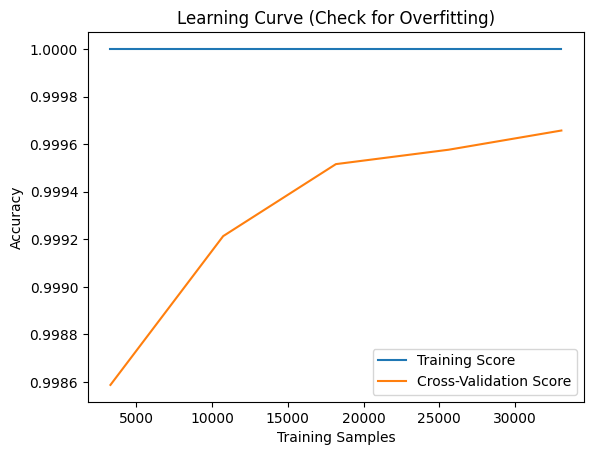

In [25]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    final_model_no_smote, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1
)

# Hitung rata-rata skor
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Visualisasi
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.title('Learning Curve (Check for Overfitting)')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Kurva pembelajaran menunjukkan bahwa model memiliki kemampuan generalisasi yang sangat baik. Meskipun training score mencapai 1.0, cross-validation score terus meningkat hingga mencapai 99.98% seiring penambahan data. Jarak yang sangat minimal antara kedua kurva membuktikan bahwa model tidak mengalami overfitting yang signifikan dan sangat handal dalam memprediksi status Fire Alarm berdasarkan data multi-senso